In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

In [3]:
audio_files = glob('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')


In [4]:
# Play audio file
ipd.Audio(audio_files[0])

#### A1.Use numpy.fft.fft()to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

In [11]:
y,sr = librosa.load('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')

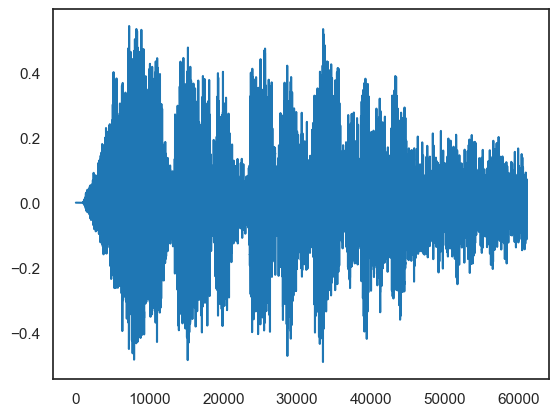

In [12]:

plt.plot(y)

In [13]:
spectral=np.fft.fft(y)
print(spectral)

[-9.66066369+0.j          3.16248694+0.55195168j -0.55800057+0.81099288j
 ...  2.49911143+1.94506814j -0.55800057-0.81099288j
  3.16248694-0.55195168j]


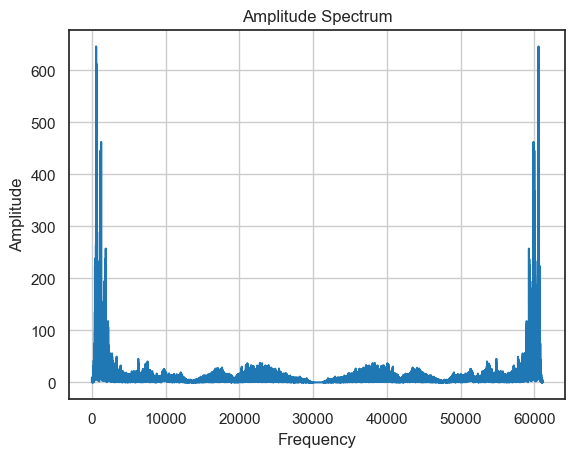

In [17]:
plt.plot(abs(spectral))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

#### A2. Use numpy.fft.ifft()to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal.

Text(0.5, 1.0, ' original signal')

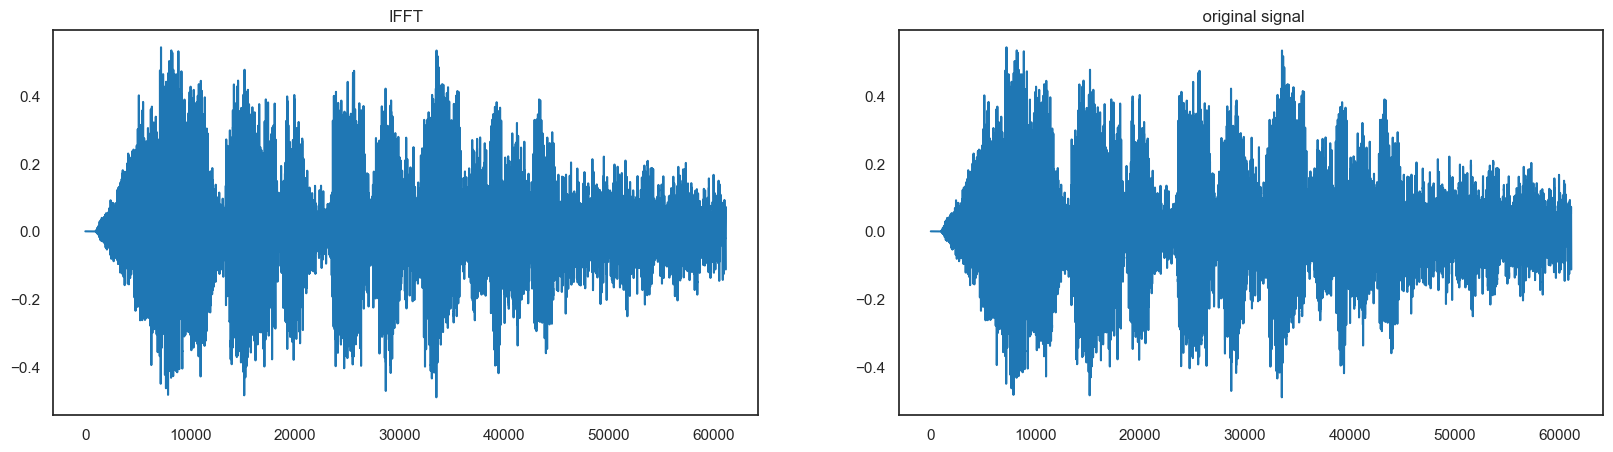

In [18]:
ifft_ = np.fft.ifft(spectral)
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(ifft_)
plt.title('IFFT')
plt.subplot(1,2,2)
plt.plot(y)
plt.title(' original signal')

#### A3. Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal.

In [19]:
from IPython.display import Audio

In [20]:
Audio('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav')

In [21]:
len(y)

61152

In [22]:
Audio(y[10000:40000],rate = sr)
word = y[10000:40000]

In [23]:
word_fft = np.fft.fft(word)

In [24]:
print(word_fft)

[-6.90885108+0.j         -0.33640982-1.56650196j  1.84843094-1.19823674j
 ...  1.74406674-1.33758679j  1.84843094+1.19823674j
 -0.33640982+1.56650196j]


Text(0.5, 1.0, 'FFT of Word')

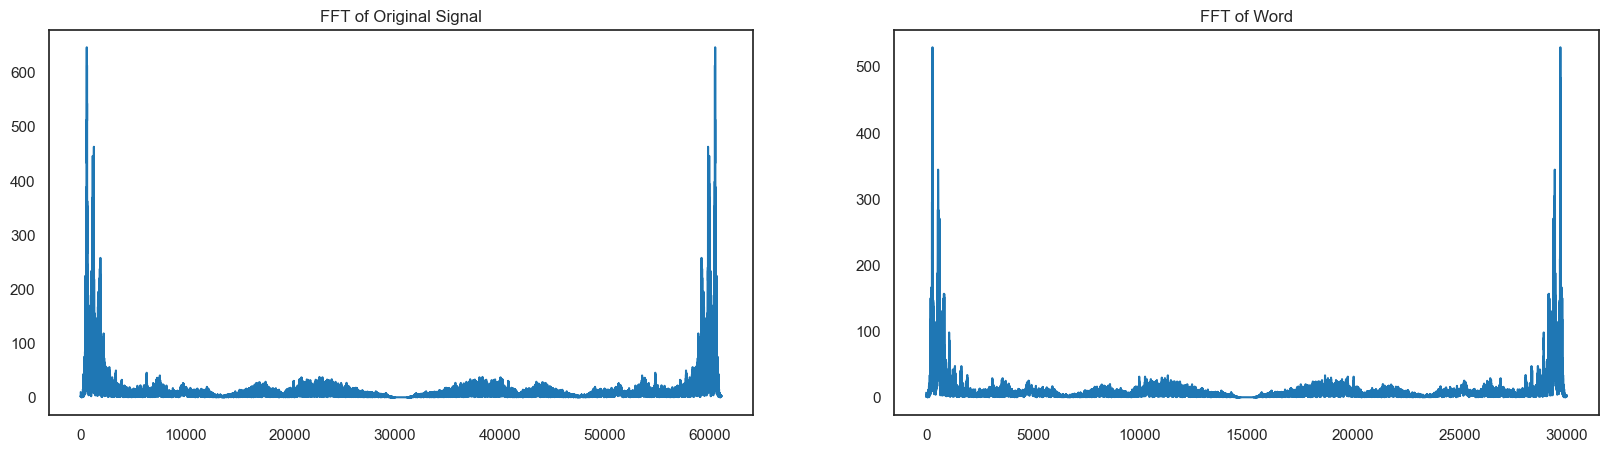

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.abs(spectral))
plt.title('FFT of Original Signal')

plt.subplot(1,2,2)
plt.plot(np.abs(word_fft))
plt.title('FFT of Word')

#### A4. Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components.

In [32]:
import numpy as np
import matplotlib.pyplot as plt
y_22500,r = librosa.load('C:\\Users\\DHANALAKSHMI\\OneDrive\\Desktop\\SPECH AI\\SPEECH1_5_2.wav',sr = 22500)
Audio(y_22500,rate = r)


In [34]:
window_length =r * 0.02
window_length

450.0

In [35]:
fft_2 = np.fft.fft(y_22500[10000:10450])

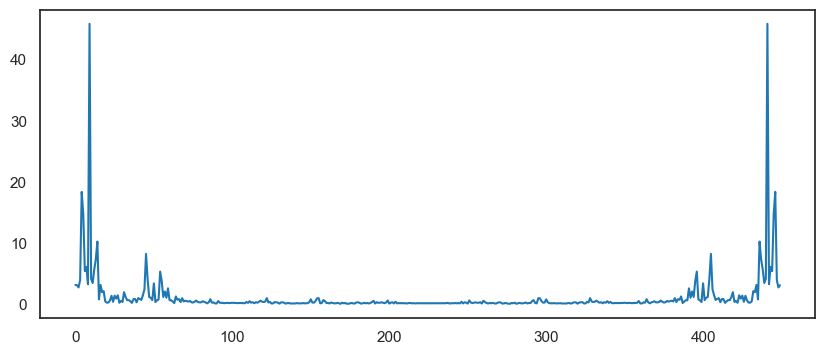

In [36]:
plt.figure(figsize=(10,4))
plt.plot(abs(fft_2))

#### A5. Break your speech signal into window lengths of 20 mSec intervals.Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix.You may use librosa.stft()or scipy.signal.stft()as well to achieve this.

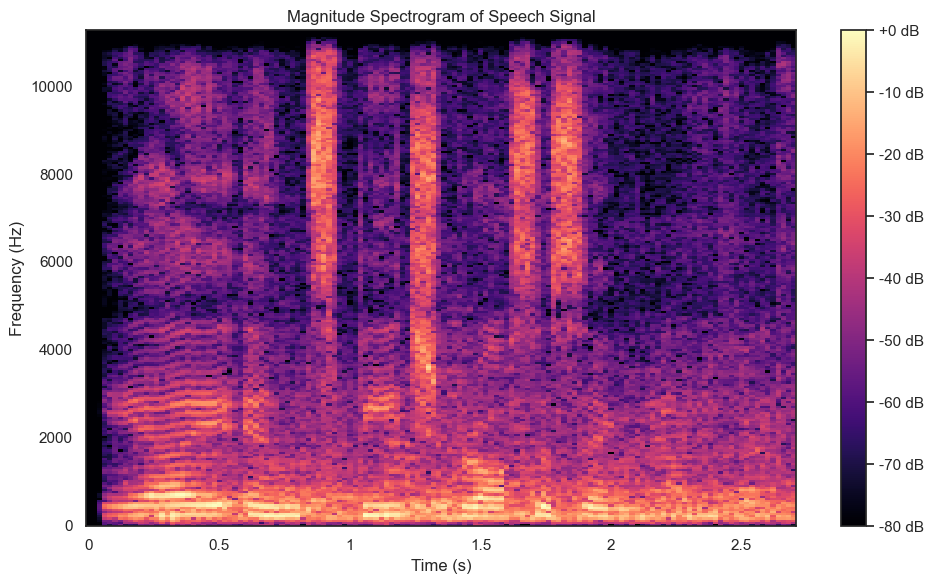

In [42]:
speech_signal_float = y.astype(float)

window_length = int(0.02 * r)  
hop_length = window_length  
# Compute STFT (Short-Time Fourier Transform)
stft_matrix = librosa.stft(speech_signal_float, n_fft=window_length, hop_length=hop_length)

# Convert complex spectrogram to magnitude spectrogram
magnitude_stft = np.abs(stft_matrix)

# Plot the magnitude spectrogram as a heatmap
plt.figure(figsize=(10, 6))
librosa.display.specshow(librosa.amplitude_to_db(magnitude_stft, ref=np.max), sr=r, hop_length=hop_length, x_axis='time', y_axis='hz')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram of Speech Signal')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.tight_layout()
plt.show()

#### A6. Use scipy.signal.spectrogram()to plot the spectrogram of the speech signal at the same duration. Compare the plots.

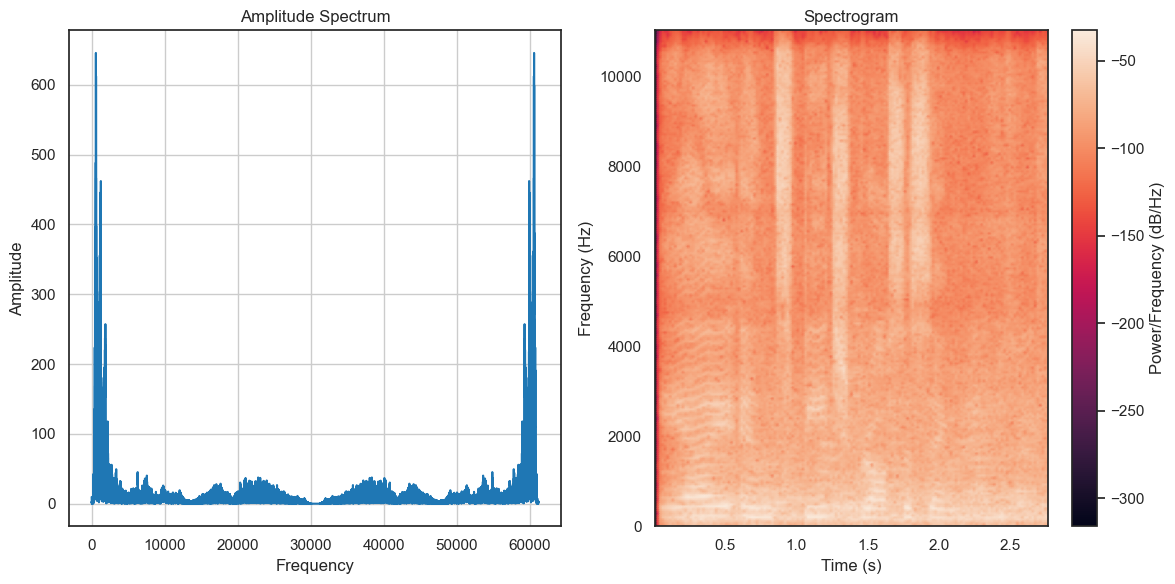

In [39]:
from scipy.signal import spectrogram

window_duration = 0.02  # 20 milliseconds
nperseg = int(window_duration * sampling_rate)
frequencies, times, Sxx = spectrogram(y, fs=sr, nperseg=nperseg)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

plt.plot(np.abs(spectral))
plt.title('Amplitude Spectrum')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.pcolormesh(times, frequencies, 10 * np.log10(Sxx), shading='gouraud')
plt.title('Spectrogram')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.colorbar(label='Power/Frequency (dB/Hz)')
plt.tight_layout()

plt.show()